In [5]:
import matplotlib.pylab as plt
import numpy as np
from collections import Counter
%matplotlib inline
plt.style.use('fivethirtyeight')

In [71]:
# Frequence analysis of a cryptogram

alphabet = u"abcdefghijklmnopqrstwxyuvz"
punctuation = u" .,;:?!-()“”–’èò"

# Cipher setup
def shift_cipher(shift, alphabet, punctuation):
    cipher = { alphabet[i]:alphabet[(i + shift) % len(alphabet)] for i in range(len(alphabet))}
    # this cipher doesn't change the punctuation
    for s in punctuation:
        cipher[s] = s
    return cipher 

def translate(text, cipher):
    assert isinstance(text, str)
    assert isinstance(cipher, dict)
    translation = str()
    for s in text:
        translation += cipher[s]
    return translation

def hide(text, hidden_symbols="", revealed_symbols=""):
    assert isinstance(text, str)
    assert isinstance(revealed_symbols, str)
    # assume that only one betwee hidden and revealed is given    
    translation = str()
    for s in text:
        if hidden_symbols == "" and revealed_symbols != "":
            if s in revealed_symbols:
                translation += s
            else:
                translation += "_"
        elif hidden_symbols != "" and revealed_symbols == "":
            if s not in hidden_symbols:
                translation += s
            else:
                translation += "_"
        else:
            print("Wrong arguments")
            break
    return translation

def import_text(ifname, alphabet):
    with open(ifname) as ifile:
        output = str() 
        for line in ifile:
            for s in line.lower():
                if s in alphabet:
                    output += s
    return output


def freq_histogram(text, alphabet):
    letters_hist = Counter(text)
    max_l = len(text)
    counts = []
    for s in alphabet:
        if s is not " ":
            counts.append(letters_hist[s] / max_l)
    return counts

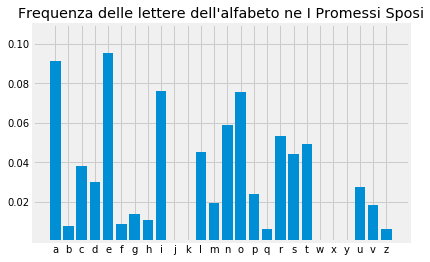

In [82]:
# create frequency histogram using I Promessi Sposi
ifname = "./Lempel-Ziv/i_promessi_sposi.md"
alphabet = "abcdefghijklmnopqrstwxyuvz"
    
promessi_sposi_str = import_text(ifname, alphabet + punctuation)   
counts = freq_histogram(promessi_sposi_str, alphabet)

# graph data
bar_x_locations = np.arange(len(counts))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, alphabet)
plt.ylim([0,0.11])
plt.yticks([0.02, 0.04, 0.06, 0.08, 0.10])
plt.title("Frequenza delle lettere dell'alfabeto ne I Promessi Sposi")
plt.savefig("images/promessi_sposi_hist.png",
           dpi=180)

In [73]:
TEXT = """\
Un silenzio, in apparenza uguale a un altro silenzio, \
potrebbe esprimere cento intenzioni diverse; \
anche un fischio, d’altronde; parlarsi tacendo, o fischiando, \
è sempre possibile; il problema è capirsi. \
Oppure nessuno può capire nessuno: \
ogni merlo crede d’aver messo nel fischio un significato fondamentale \
per lui, ma che solo lui intende; l’altro gli ribatte qualcosa che non \
ha nessuna relazione con quello che lui ha detto; è un dialogo tra sordi, \
una conversazione senza capo nè coda.\
"""
text = TEXT.lower()

aq xlohqclr, lq dssdwhqcd ajadoh d aq doywr xlohqclr, srywheeh hxswlphwh fhqyr lqyhqclrql glbhwxh; dqfkh aq ilxfklr, g’doywrqgh; sdwodwxl ydfhqgr, r ilxfkldqgr, è xhpswh srxxleloh; lo swreohpd è fdslwxl. rssawh qhxxaqr saò fdslwh qhxxaqr: rjql phwor fwhgh g’dbhw phxxr qho ilxfklr aq xljqlilfdyr irqgdphqydoh shw oal, pd fkh xror oal lqyhqgh; o’doywr jol wledyyh tadofrxd fkh qrq kd qhxxaqd whodclrqh frq tahoor fkh oal kd ghyyr; è aq gldorjr ywd xrwgl, aqd frqbhwxdclrqh xhqcd fdsr qè frgd.
__ ___e____, __ _____e___ _____e _ __ _____ ___e____, ____e__e e_____e_e _e___ ___e______ ___e__e; ____e __ _______, _’_______e; ________ ___e___, _ __________, è _e___e ________e; __ _____e__ è _______. _____e _e_____ __ò _____e _e_____: ____ _e___ __e_e _’__e_ _e___ _e_ _______ __ ___________ ______e____e _e_ ___, __ __e ____ ___ ___e__e; _’_____ ___ ______e ________ __e ___ __ _e_____ _e______e ___ __e___ __e ___ __ _e___; è __ _______ ___ _____, ___ ____e_______e _e___ ____ _è ____.
un silenzi_, in 

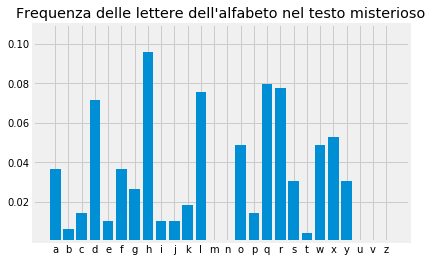

In [83]:
# Decryption using freq analysis
cipher = shift_cipher(3, alphabet, punctuation)
ukn_str = translate(text, cipher)
print(ukn_str)
print(hide(text, revealed_symbols="e" + punctuation))
print(hide(text, hidden_symbols="o"))
ukn_counts = freq_histogram(ukn_str, alphabet)

# graph data

bar_x_locations = np.arange(len(ukn_counts))
plt.bar(bar_x_locations, ukn_counts, align = 'center')
plt.xticks(bar_x_locations, alphabet)
plt.ylim([0,0.11])
plt.yticks([0.02, 0.04, 0.06, 0.08, 0.10])
plt.title("Frequenza delle lettere dell'alfabeto nel testo misterioso")
plt.savefig("images/palomar.png",
           dpi=180)